# **Práctica Imagen Jorge Rivera y Rodrigo López de Toledo**

### En esta práctica se ha hecho un clasificador para reconocer las caras de 105 famosos. El dataset utilizado tiene 17640 imágenes distintas. 

### Se han entrenado mediante Transfer Learning cuatro modelos distintos (Inception, ResNet, EfficientNet y MobileNet) y se han comparado los resultados entre estos modelos y un modelo sencillo con pocas capas.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#!rm -r LAB_JORGE_RODRIGO
!mkdir LAB_JORGE_RODRIGO
!gsutil -m cp -r drive/MyDrive/Colab\ Notebooks/IMAGE/Celebrity-Face-Recognition/* LAB_JORGE_RODRIGO/
#!mkdir LAB_JORGE_RODRIGO/105_classes_pins_dataset
#!gsutil -m cp drive/MyDrive/Colab\ Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/* LAB_JORGE_RODRIGO/105_classes_pins_dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
Copying file://drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/pins_Katherine Langford/Katherine Langford220_2990.jpg...
Copying file://drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/pins_Katherine Langford/Katherine Langford174_2950.jpg...
Copying file://drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/pins_Katherine Langford/Katherine Langford50_3047.jpg...
Copying file://drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/pins_Katherine Langford/Katherine Langford210_2982.jpg...
Copying file://drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/pins_Katherine Langford/Katherine Langford13_2900.jpg...
Copying file://drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/105_classes_pins_dataset/pins_Katherine Langford/Katherine

In [9]:
import os
work_dir = "LAB_JORGE_RODRIGO"
train_dir = os.path.join(work_dir,'training')       #Path of train directory. 
val_dir = os.path.join(work_dir,'validation')         #Path of test directory.
os.makedirs(train_dir, exist_ok=True)  #Creating a directory for training examples. 
os.makedirs(val_dir, exist_ok=True)   #Creating a directory for testing examples. 

In [10]:
train_ratio=0.8
val_ratio=0.2
dir_list=os.listdir(os.path.join(work_dir ,'105_classes_pins_dataset'))
print('The Number of Classes in the Dataset is:{}'.format(len(dir_list)))

The Number of Classes in the Dataset is:106


In [11]:
#This Code will split up the unzipped dataset into training and testing set with respect to the values of train_ratio and test_ratio.
from shutil import copyfile
import numpy as np

source_dir = os.path.join(work_dir ,'105_classes_pins_dataset')        #Unzipped dataset directory 

dir_list = os.listdir(source_dir)

for folder in dir_list:
    if folder != ".DS_Store":
      data_dir = os.listdir(os.path.join(source_dir,folder))
      np.random.shuffle(data_dir)                            #Shuffling the examples of the classes inside the dataset.
      os.makedirs(os.path.join(train_dir , folder), exist_ok=True)
      os.makedirs(os.path.join(val_dir , folder), exist_ok=True)
      train_data = data_dir[:int(len(data_dir)*train_ratio+1)] #Splitting the training dataset with respect to the train_ratio.
      val_data = data_dir[-int(len(data_dir)*val_ratio):]
    
      for image in train_data:
          copyfile(os.path.join(source_dir,folder,image) , os.path.join(train_dir,folder,image)) #Copying the Training files from dataset to training directory.
      
      for image in val_data:
        copyfile(os.path.join(source_dir,folder,image) , os.path.join(val_dir,folder,image))  #Copying the Training files from dataset to training directory.
    

In [12]:

print("The Number of Classes in the Training Set:{}".format(len(os.listdir(train_dir))))
print("The Number Of Classes in the Validation Set:{}".format(len(os.listdir(val_dir))))
print('For Verification of the Split.....')
print("The Number of Examples in the Class='pins_barack obama' in the Dataset Directory:{}".format(len(os.listdir(os.path.join(source_dir,'pins_barack obama')))))
print("The Number of Examples in the Class='pins_barack obama' in the Train Directory:{}".format(len(os.listdir(os.path.join(train_dir,'pins_barack obama')))))
print("The Number of Examples in the Class='pins_barack obama' in the Validation Directory:{}".format(len(os.listdir(os.path.join(val_dir,'pins_barack obama')))))


The Number of Classes in the Training Set:105
The Number Of Classes in the Validation Set:105
For Verification of the Split.....
The Number of Examples in the Class='pins_barack obama' in the Dataset Directory:119
The Number of Examples in the Class='pins_barack obama' in the Train Directory:96
The Number of Examples in the Class='pins_barack obama' in the Validation Directory:23


In [13]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rows=160  #Number of Pixels in the Rows for Input. 
cols=160  #Number of Pixels in Columns for Output

In [ ]:
trained_model=MobileNetV2(input_shape=(rows,cols,3),include_top=False,weights='imagenet')   
trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
trained_model.summary()

In [ ]:
trained_model=EfficientNetB7(input_shape=(rows,cols,3),include_top=False,weights='imagenet')   
trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
trained_model.summary()

In [ ]:
trained_model=ResNet152V2(input_shape=(rows,cols,3),include_top=False,weights='imagenet')   
trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
trained_model.summary()

In [ ]:
trained_model=InceptionResNetV2(input_shape=(rows,cols,3),include_top=False,weights='imagenet')   
trained_model.trainable=True  #Un-Freeze all the pretrained layers of 'MobileNetV2 for Training.
trained_model.summary()

In [ ]:
#For MobileNet
last_layer=trained_model.get_layer('out_relu')   
last_layer_output=last_layer.output  

In [ ]:
# For EfficientNet
last_layer=trained_model.get_layer('top_activation')   
last_layer_output=last_layer.output

In [ ]:
# For ResNet
last_layer=trained_model.get_layer('post_relu')   
last_layer_output=last_layer.output

In [ ]:
# For Inception
last_layer=trained_model.get_layer('conv_7b_ac')   
last_layer_output=last_layer.output

In [ ]:
#Callback Function which stops training when accuracy reaches 99.5%.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks=myCallback()

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
#Add a Dropout layer.
x = tf.keras.layers.Dropout(0.5)(x)                      
# Add a final softmax layer for classification.
x = tf.keras.layers.Dense(105,activation='softmax')(x)

model = tf.keras.Model(trained_model.input,x) 

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
#Summary of the model.
model.summary()

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=40,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
                                 
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(rows,cols),
                                                  class_mode='categorical')

val_generator=val_datagen.flow_from_directory(val_dir,
                                                target_size=(rows,cols),
                                                class_mode='categorical')

Found 14084 images belonging to 105 classes.
Found 3463 images belonging to 105 classes.


In [ ]:
result=model.fit(train_generator,
                 validation_data=val_generator,
                 epochs=50,
                 callbacks=[callbacks],
                 verbose=1)

In [ ]:
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

loss = result.history['loss']
val_loss = result.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(9, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save the weights
model.save_weights('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/inception.ckpt')
model.save('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/inception.h5')

## Resultados obtenidos

### A continuación, se muestran las gráficas del accuracy obtenido con cada uno de los modelos. También se prueba su funcionamiento con un conjunto de 10 fotos de famosos incluidos en el dataset sacadas de Internet para ver si los clasifica correctamente.

## EfficientNet

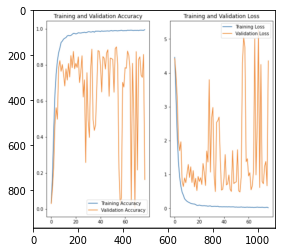

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/EfficientNet.png')
imgplot = plt.imshow(img)
plt.show()

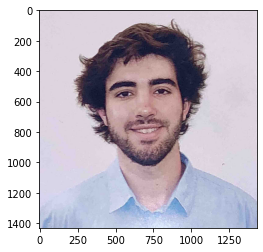

The Person in the Image is Barack Obama .


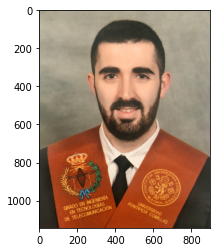

The Person in the Image is Barack Obama .


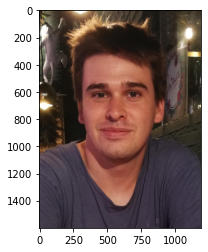

The Person in the Image is Kiernen Shipka .


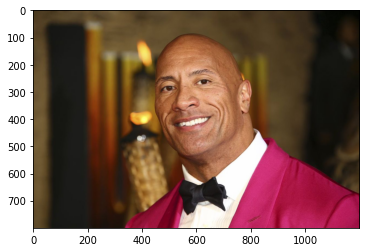

The Person in the Image is Jeff Bezos .


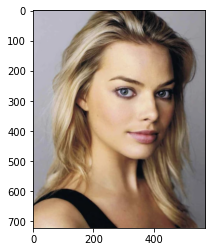

The Person in the Image is Ben Affleck .


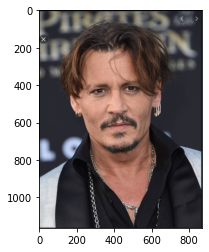

The Person in the Image is Bobby Morley .


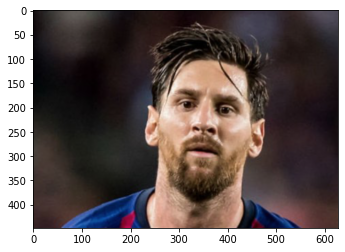

The Person in the Image is Ben Affleck .


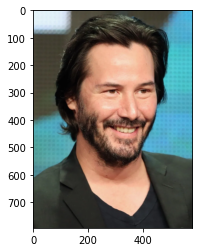

The Person in the Image is Barack Obama .


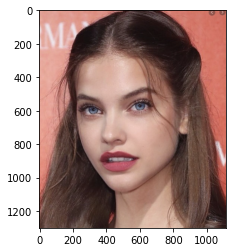

The Person in the Image is Millie Bobby Brown .


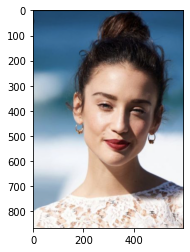

The Person in the Image is Elon Musk .


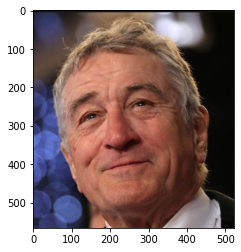

The Person in the Image is Robert De Niro .


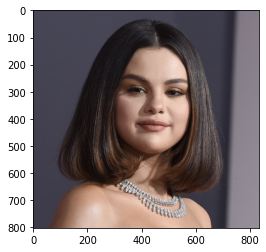

The Person in the Image is Dominic Purcell .


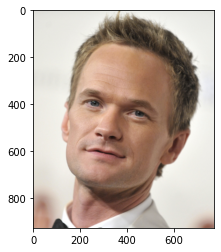

The Person in the Image is Barack Obama .


In [15]:
import os
test_dir = "drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/"
test_dir = os.listdir(test_dir)
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/effNet.h5')

for image in test_dir:

  path="drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/" + str(image)  #Path to the target image to be predicted. 

  classes=train_generator.class_indices
  class_names=list(classes.keys())   #List of the class names
  img = tf.keras.preprocessing.image.load_img(path, target_size=(rows, cols))

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  img_array=img_array/255.

  score = new_model.predict(img_array)

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  im = 'drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/' + str(image)
  img = mpimg.imread(im)
  imgplot = plt.imshow(img)
  plt.show()

  print(
      "The Person in the Image is {} ."
      .format(class_names[np.argmax(score)][5:].title())
  )


## Inception

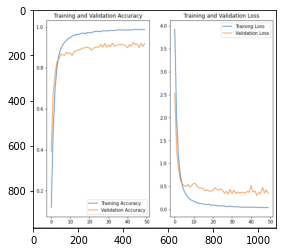

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/Inception.png')
imgplot = plt.imshow(img)
plt.show()

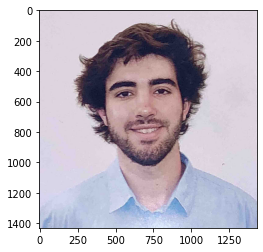

The Person in the Image is Josh Radnor .


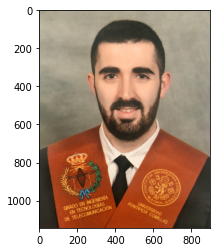

The Person in the Image is Tom Ellis .


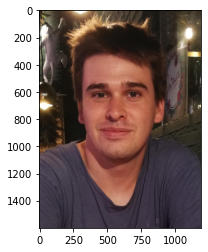

The Person in the Image is Marie Avgeropoulos .


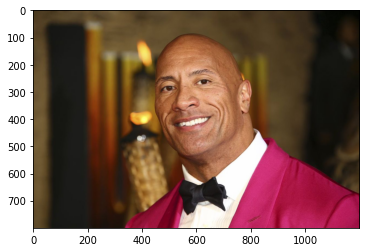

The Person in the Image is Dwayne Johnson .


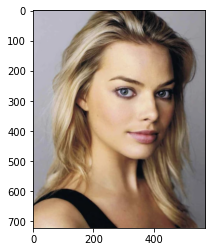

The Person in the Image is Margot Robbie .


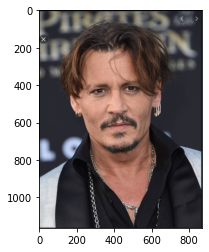

The Person in the Image is Johnny Depp .


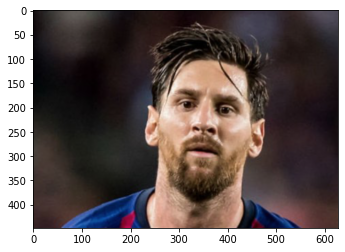

The Person in the Image is Lionel Messi .


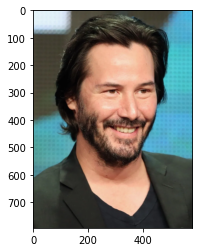

The Person in the Image is Keanu Reeves .


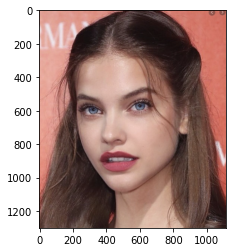

The Person in the Image is Barbara Palvin .


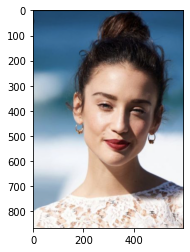

The Person in the Image is Josh Radnor .


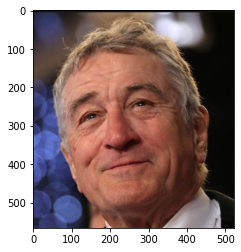

The Person in the Image is Robert De Niro .


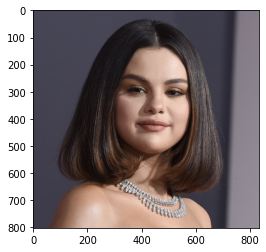

The Person in the Image is Camila Mendes .


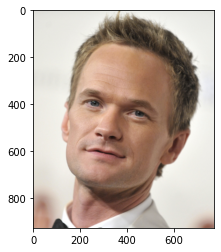

The Person in the Image is Neil Patrick Harris .


In [17]:
test_dir = "drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/"
test_dir = os.listdir(test_dir)
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/inception.h5')

for image in test_dir:

  path="drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/" + str(image)  #Path to the target image to be predicted. 

  classes=train_generator.class_indices
  class_names=list(classes.keys())   #List of the class names
  img = tf.keras.preprocessing.image.load_img(path, target_size=(rows, cols))

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  img_array=img_array/255.

  score = new_model.predict(img_array)

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  im = 'drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/' + str(image)
  img = mpimg.imread(im)
  imgplot = plt.imshow(img)
  plt.show()

  print(
      "The Person in the Image is {} ."
      .format(class_names[np.argmax(score)][5:].title())
  )

## MobileNet

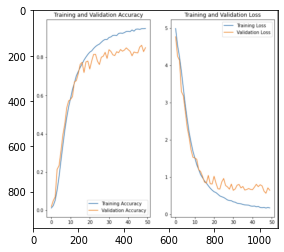

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/MobileNet.png')
imgplot = plt.imshow(img)
plt.show()

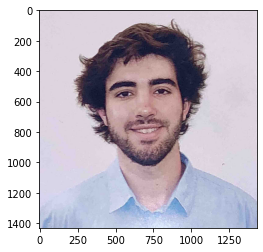

The Person in the Image is Tom Ellis .


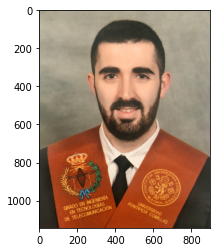

The Person in the Image is Tom Ellis .


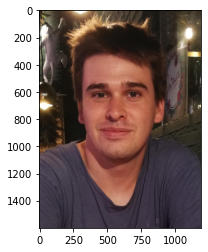

The Person in the Image is Jimmy Fallon .


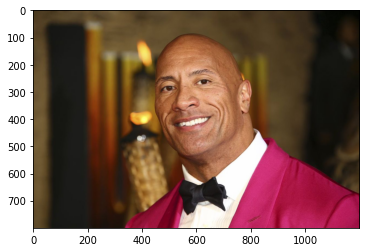

The Person in the Image is Dwayne Johnson .


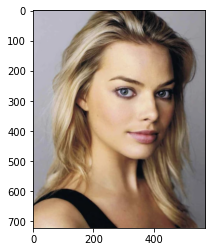

The Person in the Image is Margot Robbie .


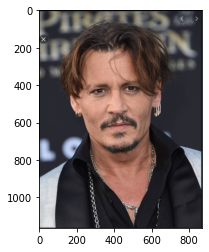

The Person in the Image is Johnny Depp .


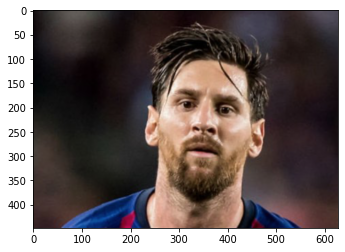

The Person in the Image is Lionel Messi .


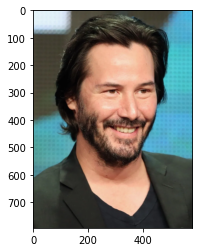

The Person in the Image is Keanu Reeves .


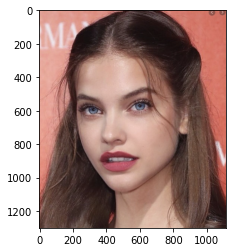

The Person in the Image is Barbara Palvin .


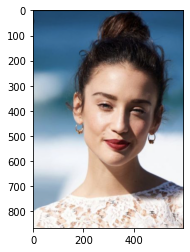

The Person in the Image is Maria Pedraza .


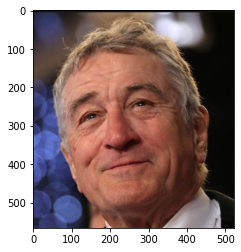

The Person in the Image is Robert De Niro .


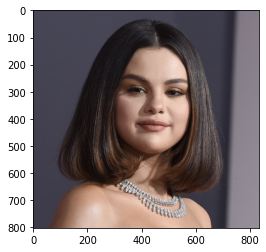

The Person in the Image is Camila Mendes .


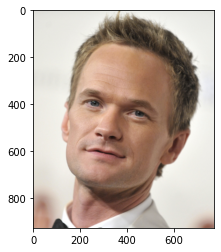

The Person in the Image is Neil Patrick Harris .


In [19]:
test_dir = "drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/"
test_dir = os.listdir(test_dir)
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/mobilenet.h5')

for image in test_dir:

  path="drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/" + str(image)  #Path to the target image to be predicted. 

  classes=train_generator.class_indices
  class_names=list(classes.keys())   #List of the class names
  img = tf.keras.preprocessing.image.load_img(path, target_size=(rows, cols))

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  img_array=img_array/255.

  score = new_model.predict(img_array)

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  im = 'drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/' + str(image)
  img = mpimg.imread(im)
  imgplot = plt.imshow(img)
  plt.show()

  print(
      "The Person in the Image is {} ."
      .format(class_names[np.argmax(score)][5:].title())
  )


## ResNet

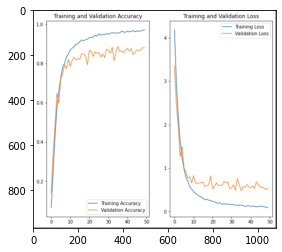

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/ResNet.png')
imgplot = plt.imshow(img)
plt.show()

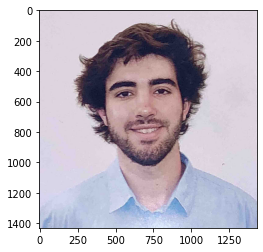

The Person in the Image is Josh Radnor .


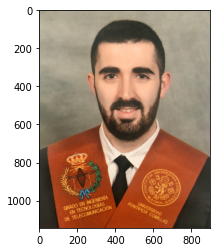

The Person in the Image is Maisie Williams .


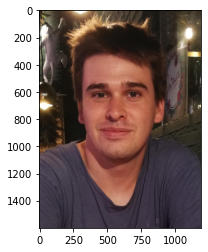

The Person in the Image is Emma Watson .


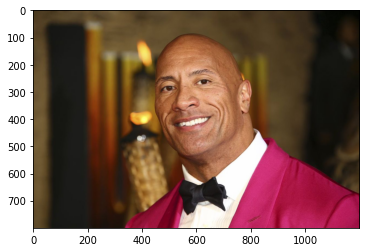

The Person in the Image is Morgan Freeman .


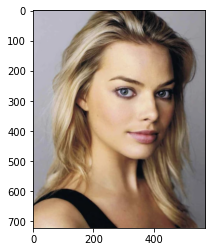

The Person in the Image is Amber Heard .


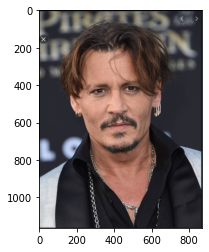

The Person in the Image is Bobby Morley .


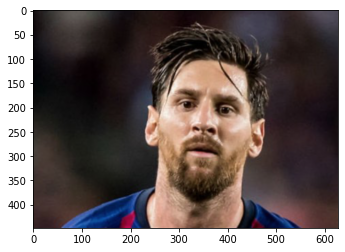

The Person in the Image is Lionel Messi .


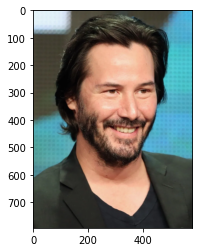

The Person in the Image is Morgan Freeman .


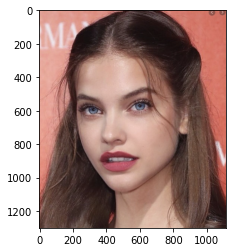

The Person in the Image is Barbara Palvin .


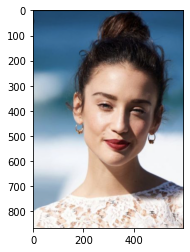

The Person in the Image is Amber Heard .


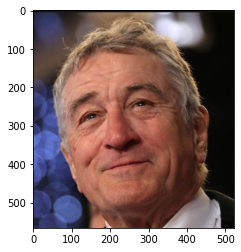

The Person in the Image is Robert De Niro .


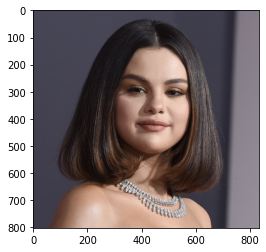

The Person in the Image is Katherine Langford .


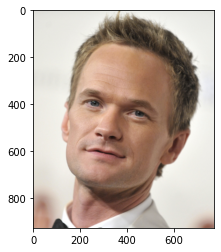

The Person in the Image is Neil Patrick Harris .


In [21]:
test_dir = "drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/"
test_dir = os.listdir(test_dir)
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/resnet.h5')

for image in test_dir:

  path="drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/" + str(image)  #Path to the target image to be predicted. 

  classes=train_generator.class_indices
  class_names=list(classes.keys())   #List of the class names
  img = tf.keras.preprocessing.image.load_img(path, target_size=(rows, cols))

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  img_array=img_array/255.

  score = new_model.predict(img_array)

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  im = 'drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/' + str(image)
  img = mpimg.imread(im)
  imgplot = plt.imshow(img)
  plt.show()

  print(
      "The Person in the Image is {} ."
      .format(class_names[np.argmax(score)][5:].title())
  )


## Modelo Sencillo

Se ve que tiene muchisimo overfitting, haciendo que las pruebas de tests funcionen peor que en la mayoria de modelos hechos con transfer learning

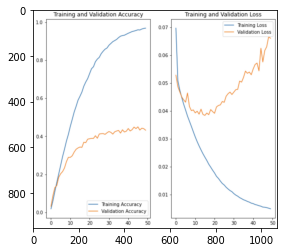

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/simpleModel.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import os
test_dir = "drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/"
test_dir = os.listdir(test_dir)
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/runs/model.h5')

for image in test_dir:

  path="drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/" + str(image)  #Path to the target image to be predicted. 

  classes=train_generator.class_indices
  class_names=list(classes.keys())   #List of the class names
  img = tf.keras.preprocessing.image.load_img(path, target_size=(rows, cols))

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  img_array=img_array/255.

  score = new_model.predict(img_array)

  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  im = 'drive/MyDrive/Colab Notebooks/IMAGE/Celebrity-Face-Recognition/samples/' + str(image)
  img = mpimg.imread(im)
  imgplot = plt.imshow(img)
  plt.show()

  print(
      "The Person in the Image is {} ."
      .format(class_names[np.argmax(score)][5:].title())
  )